#### 1) Visualize univariate distribution of each continuous feature and the distribution of the target

Looks like lots of Nans. Will fix later in pipeline step.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get data
data = pd.read_excel(
    'http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls'
)  


continuous_features = [
                       "Lot Frontage",
                       "Lot Area",
                       "Mas Vnr Area",
                       "BsmtFin SF 1",
                       "BsmtFin SF 2",
                       "Bsmt Unf SF",
                       "Total Bsmt SF",
                       "1st Flr SF",
                       "2nd Flr SF",
                       "Low Qual Fin SF",
                       "Gr Liv Area",
                       "Garage Area",
                       "Wood Deck SF",
                       "Open Porch SF",
                       "Enclosed Porch",
                       "3Ssn Porch",
                       "Screen Porch",
                       "Pool Area",
                       "Misc Val",
                       "SalePrice",
                      ]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


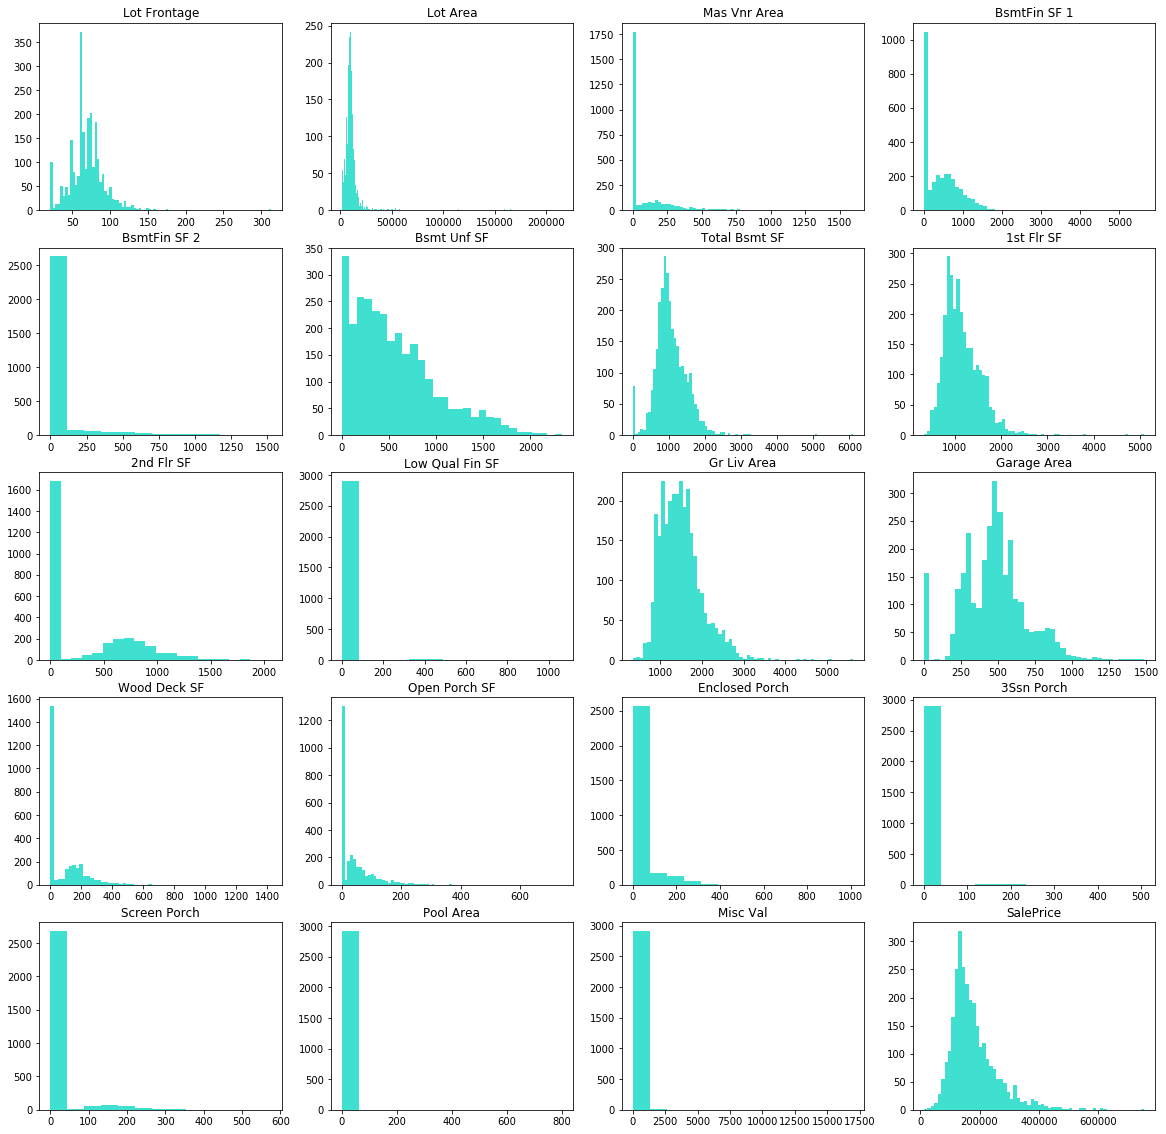

In [14]:
# Make histograms 
fig, ax = plt.subplots(5, 4, figsize=(20,20))

count = 0
for row in range(5):
  for column in range(4):
    ax[row][column].hist(
        data[continuous_features[count]], 
        bins="auto", 
        color="turquoise",
    )
    ax[row][column].set_title(continuous_features[count])
    count +=1


#### 2) Visualize dependency of the target on each continuous feature

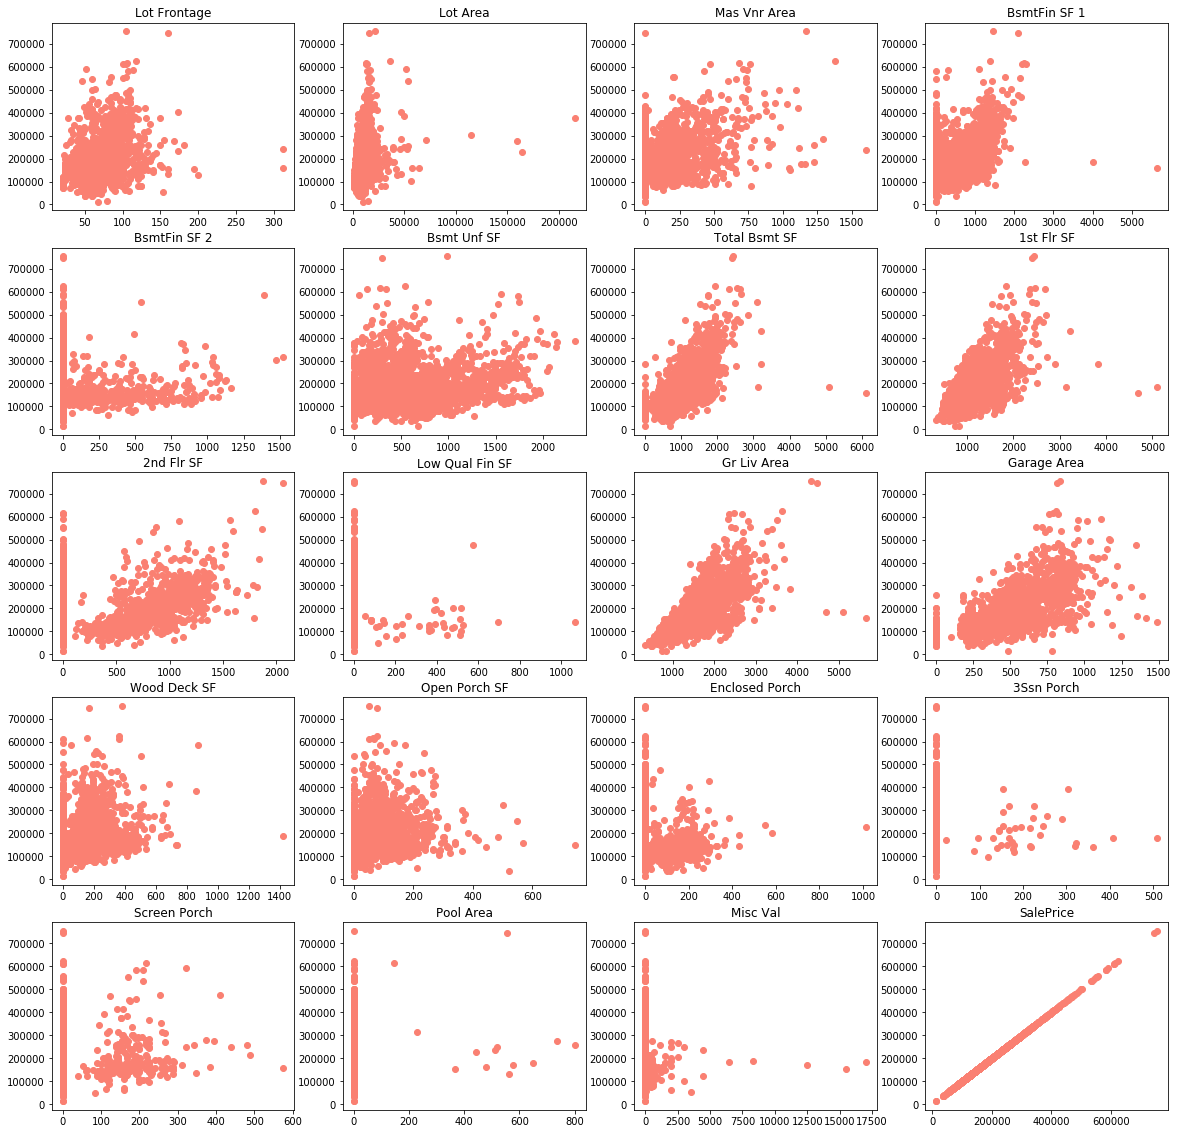

In [15]:
# Make scatter plots, ignore the last one, included so the grid worked.
fig, ax = plt.subplots(5, 4, figsize=(20,20))

count = 0
for row in range(5):
  for column in range(4):
    ax[row][column].scatter(
        data[continuous_features[count]],
        data["SalePrice"], 
        color="salmon",
    )
    ax[row][column].set_title(continuous_features[count])
    count +=1

#### 3) Split into train / test. For each categorical (nominal) variable, cross-validate a Linear Regression model using just this variable (one-hot encoded). Visualize the categorical variable that provide the best R^2 value with the target. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Get nominal feature columns in obj,  and then the sale price in obj
nominal_features_text = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", "Misc Feature", "Sale Type", "Sale Condition"]
nominal_features = [data[feature] for feature in nominal_features_text]
sale_price = pd.DataFrame(data["SalePrice"])

# Loop through all nominal features and use linear regression, print out R2
for item in nominal_features_text:
  nominal_features_item = pd.DataFrame(data[item])
  nominal_features_item = pd.get_dummies(nominal_features_item)
  X_train, X_test, y_train, y_test = train_test_split(nominal_features_item, sale_price, test_size=.20,)
  clf = LinearRegression().fit(X_train, y_train)
  print("--------------------------------------------------------------".format(item, clf.intercept_, clf.coef_))
  print("SK Learn Weights {}: {}".format(item, clf.intercept_, clf.coef_))
  print("Accuracy from sk-learn {}: {}".format(item, clf.score(nominal_features_item, sale_price)))

--------------------------------------------------------------
SK Learn Weights PID: [256683.40846511]
Accuracy from sk-learn PID: 0.06075069901618868
--------------------------------------------------------------
SK Learn Weights MS SubClass: [190343.16018162]
Accuracy from sk-learn MS SubClass: 0.007227703832114685
--------------------------------------------------------------
SK Learn Weights MS Zoning: [3.61893434e+17]
Accuracy from sk-learn MS Zoning: 0.11560222809523168
--------------------------------------------------------------
SK Learn Weights Street: [1.43128408e+18]
Accuracy from sk-learn Street: 0.0034448556281732046
--------------------------------------------------------------
SK Learn Weights Alley: [182350.91346154]
Accuracy from sk-learn Alley: 0.021869895252883076
--------------------------------------------------------------
SK Learn Weights Land Contour: [1.19128849e+18]
Accuracy from sk-learn Land Contour: 0.04038870996850119
-------------------------------------

Looks like neighborhood is the highest R^2 value with the target. Need to graph.

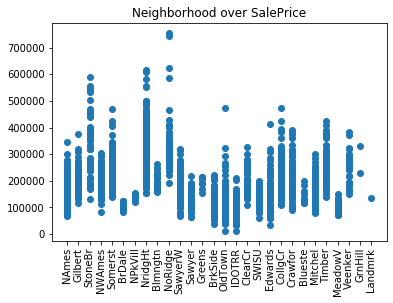

In [17]:
# This shows each neighborhood plotted against the target
nominal_features_item = pd.DataFrame(data["Neighborhood"])
nominal_features_item = pd.get_dummies(nominal_features_item)

X_train, X_test, y_train, y_test = train_test_split(nominal_features_item, sale_price, test_size=.20,)
regressor = LinearRegression().fit(X_train, y_train)
plot_me = [nominal_features_item[column] for column in nominal_features_item]
plt.scatter(data["Neighborhood"], data["SalePrice"])
plt.xticks(rotation=90)
plt.title("Neighborhood over SalePrice")
plt.show()

4) Use Column Transformer and pipeline to encode categorical variables. 


In [0]:

# temp = []
# for 


# new_dropped_data = pd.DataFrame(data=temp, columns=data.columns)

In [34]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

######################################################################
# Use column transformer and pipeline to encode categorical variables. 
######################################################################


# More attempts at removing NaNs
# data = data.dropna(axis=0, how="any")
# Weirdly enough data["Something"].dropna() works.
# But then I would have to reconstruct a new dataframe from scratch.
# Don't think that makes sense or would be the correc thing to do.
# If I do that, then I drop NaNs from each column. That won't work
# because then it would not drop by row, so each data's shape would be off. 

# Split X and y
X_train, X_test, y_train, y_test = train_test_split(data, data["SalePrice"], test_size=.20,)

# Doesn't work. Neither does data.dropna() leaves data empty. Nothing works. 
# nan_columns = np.any(np.isnan(X_train), axis=0)
# X_drop_columns = X_train[:, ~nan_columns]

# Define transformer
column_transformer = ColumnTransformer(
    [
     # 23 nominal
    #  ("PID", OneHotEncoder(), ["PID"]),
    #  ("MS SubClass", OneHotEncoder(), ["MS SubClass"]),
    #  ("MS Zoning", OneHotEncoder(), ["MS Zoning"]),
    #  ("Street", OneHotEncoder(), ["Street"]),
    #  ("Alley", OneHotEncoder(), ["Alley"]),
    #  ("Land Contour", OneHotEncoder(), ["Lot Config"]),
    #  ("Neighborhood", OneHotEncoder(), ["Neighborhood"]),
    #  ("Condition 1", OneHotEncoder(), ["Condition 1"]),
    #  ("Condition 2", OneHotEncoder(), ["Condition 2"]),
    #  ("Bldg Type", OneHotEncoder(), ["Bldg Type"]),
    #  ("House Style", OneHotEncoder(), ["House Style"]),
    #  ("Roof Style", OneHotEncoder(), ["Roof Style"]),
    #  ("Roof Matl", OneHotEncoder(), ["Roof Matl"]),
    #  ("Exterior 1st", OneHotEncoder(), ["Exterior 1st"]),
    #  ("Exterior 2nd", OneHotEncoder(), ["Exterior 2nd"]),
    #  ("Mas Vnr Type", OneHotEncoder(), ["Mas Vnr Type"]),
    #  ("Foundation", OneHotEncoder(), ["Foundation"]),
    #  ("Heating", OneHotEncoder(), ["Heating"]),
    #  ("Central Air", OneHotEncoder(), ["Central Air"]),
    #  ("Garage Type", OneHotEncoder(), ["Garage Type"]),
    #  ("Misc Feature", OneHotEncoder(), ["Misc Feature"]),
    #  ("Sale Type", OneHotEncoder(), ["Sale Type"]),
    #  ("Sale Condition", OneHotEncoder(), ["Sale Condition"]),
     # 23 ordinal
     ("Lot Shape", OrdinalEncoder(), ["Lot Shape"]),
     ("Utilities", OrdinalEncoder(), ["Utilities"]),
     ("Land Slope", OrdinalEncoder(), ["Land Slope"]),
     ("Overall Qual", OrdinalEncoder(), ["Overall Qual"]),
     ("Overall Cond", OrdinalEncoder(), ["Overall Cond"]),
     ("Exter Qual", OrdinalEncoder(), ["Exter Qual"]),
     ("Exter Cond", OrdinalEncoder(), ["Exter Cond"]),
     ("Bsmt Qual", OrdinalEncoder(), ["Bsmt Qual"]),
     ("Bsmt Cond", OrdinalEncoder(), ["Bsmt Cond"]),
     ("Bsmt Exposure", OrdinalEncoder(), ["Bsmt Exposure"]),
     ("BsmtFin Type 1", OrdinalEncoder(), ["BsmtFin Type 1"]),
     ("BsmtFin Type 2", OrdinalEncoder(), ["BsmtFin Type 2"]),
     ("Heating QC", OrdinalEncoder(), ["Heating QC"]),
     ("Electrical", OrdinalEncoder(), ["Electrical"]),
     ("Kitchen Qual", OrdinalEncoder(), ["Kitchen Qual"]),
     ("Functional", OrdinalEncoder(), ["Functional"]),
     ("Fireplace Qu", OrdinalEncoder(), ["Fireplace Qu"]),
     ("Garage Finish", OrdinalEncoder(), ["Garage Finish"]),
     ("Garage Qual", OrdinalEncoder(), ["Garage Qual"]),
     ("Garage Cond", OrdinalEncoder(), ["Garage Cond"]),
     ("Paved Drive", OrdinalEncoder(), ["Paved Drive"]),
     ("Pool QC", OrdinalEncoder(), ["Pool QC"]),
     ("Fence", OrdinalEncoder(), ["Fence"]),
     # Discrete
    #  ("Order", SimpleImputer(), ["Order"]),
    #  ("Year Built", SimpleImputer(), ["Year Built"]),
    #  ("Year Remod/Add", SimpleImputer(), ["Year Remod/Add"]),
    #  ("Bsmt Full Bath", SimpleImputer(), ["Bsmt Full Bath"]),
    #  ("Bsmt Half Bath", SimpleImputer(), ["Bsmt Half Bath"]),
    #  ("Full Bath", SimpleImputer(), ["Full Bath"]),
    #  ("Half Bath", SimpleImputer(), ["Half Bath"]),
    #  ("Bedroom AbvGr", SimpleImputer(), ["Bedroom AbvGr"]),
    #  ("Kitchen AbvGr", SimpleImputer(), ["Kitchen AbvGr"]),
    #  ("TotRms AbvGrd", SimpleImputer(), ["TotRms AbvGrd"]),
    #  ("Fireplaces", SimpleImputer(), ["Fireplaces"]),
    #  ("Garage Yr Blt", SimpleImputer(), ["Garage Yr Blt"]),
    #  ("Garage Cars", SimpleImputer(), ["Garage Cars"]),
    #  ("Mo Sold", SimpleImputer(), ["Mo Sold"]),
    #  ("Yr Sold", SimpleImputer(), ["Yr Sold"]),
     # Continuous 
    #  ("Lot Frontage", SimpleImputer(), ["Lot Frontage"]),
    #  ("Lot Area", SimpleImputer(), ["Lot Area"]),
    #  ("Mas Vnr Area", SimpleImputer(), ["Mas Vnr Area"]),
    #  ("BsmtFin SF 1", SimpleImputer(), ["BsmtFin SF 1"]),
    #  ("BsmtFin SF 2", SimpleImputer(), ["BsmtFin SF 2"]),
    #  ("Bsmt Unf SF", SimpleImputer(), ["Bsmt Unf SF"]),
    #  ("Total Bsmt SF", SimpleImputer(), ["Total Bsmt SF"]),
    #  ("1st Flr SF", SimpleImputer(), ["1st Flr SF"]),
    #  ("2nd Flr SF", SimpleImputer(), ["2nd Flr SF"]),
    #  ("Low Qual Fin SF", SimpleImputer(), ["Low Qual Fin SF"]),
    #  ("Gr Liv Area", SimpleImputer(), ["Gr Liv Area"]),
    #  ("Garage Area", SimpleImputer(), ["Garage Area"]),
    #  ("Wood Deck SF", SimpleImputer(), ["Wood Deck SF"]),
    #  ("Open Porch SF", SimpleImputer(), ["Open Porch SF"]),
    #  ("Enclosed Porch", SimpleImputer(), ["Enclosed Porch"]),
    #  ("3Ssn Porch", SimpleImputer(), ["3Ssn Porch"]),
    #  ("Screen Porch", SimpleImputer(), ["Screen Porch"]),
    #  ("Pool Area", SimpleImputer(), ["Pool Area"]),
    #  ("Misc Val", SimpleImputer(), ["Misc Val"]),
    #  ("SalePrice", SimpleImputer(), ["SalePrice"]),
    ],
    remainder='passthrough'
)

# Can uncomment to examine transformer
# column_transformer.fit(X_drop_columns)
# column_transformer.get_feature_names()
# column_transformer.transform(X_train).toarray()

#############################################################
# Pipline with transformer and OLS, Ridge, Lasso, ElasticNet
# Cross validation included but no scalers
#############################################################

# print(X_train)

# OLS
pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), column_transformer, LinearRegression())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("No Scaler - Linear Regression (OLS): {}, {}\n".format(np.mean(scores), np.std(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Specifying the columns using strings is only supported for pandas DataFrames

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Specifying the columns using strings is only supported for pandas DataFrames

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Specifying the columns using strings is only supported for pandas DataFrames

  FitFailedWarning)
/usr/local/lib/python3.6/dist-p

No Scaler - Linear Regression (OLS): nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Specifying the columns using strings is only supported for pandas DataFrames

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Specifying the columns using strings is only supported for pandas DataFrames

  FitFailedWarning)


In [27]:
# Ridge
pipeline = make_pipeline(column_transformer, Ridge())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("No Scaler - Ridge: {}, {}\n".format(np.mean(scores), np.std(scores)))

# Lasso
pipeline = make_pipeline(column_transformer, Lasso())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("Lasso - Ridge: {}, {}\n".format(np.mean(scores), np.std(scores)))

# ElasticNet
pipeline = make_pipeline(column_transformer, ElasticNet())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("No Scaler - Elastic Net: {}, {}\n".format(np.mean(scores), np.std(scores)))

#############################################################
# With Standard Scalers
#############################################################

# OLS
pipe = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("With Scale - Linear Regression: {}, {}\n".format(np.mean(scores), np.std(scores)))


# Ridge
pipe = make_pipeline(StandardScaler(), Ridge())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("With Scaler - Ridge: {}, {}\n".format(np.mean(scores), np.std(scores)))

# Lasso
pipe = make_pipeline(StandardScaler(), Lasso())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("With Scaler - Lasso: {}, {}\n".format(np.mean(scores), np.std(scores)))

# Elastic Net using cross validation.
pipe = make_pipeline(StandardScaler(), ElasticNet())
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("With Scaler - Elastic net: {}, {}\n".format(np.mean(scores), np.std(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

No Scaler - Ridge: nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

Lasso - Ridge: nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

No Scaler - Elastic Net: nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

With Scale - Linear Regression: nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

With Scaler - Ridge: nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

With Scaler - Lasso: nan, nan

With Scaler - Elastic net: nan, nan



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

5) Use GridSearch to tune the parameters for Ridge, Lasso, and ElasticNet. Visualize the dependence of the validation score on the parameteres. 

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# TODO: A lot. I know what needs to be done though I need to get gridsearch
# to tune each parameter and visualize it. I think I would need to put gridsearch
# in the pipeline but am not sure. Didn't get this far unfortately. 
# I would need to first onehotencode to deal with text, then train model then 
# grid search, hence why I think it would make sense to be in the pipeline. 

# As far as data viz goes I would just use the slide you have showing grid search
# and how it tunes each parameter. It looks like a heatmap but can't run it. 

# Ridge



# Lasso
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)
grid = GridSearchCV(Lasso(normalize=True), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

# Elastic Net
# which alpha gives what r^2
param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}

grid = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


#Graph the gridsearch results
res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
   values='mean_test_score', index='param_alpha', columns='param_l1_ratio')

{'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

ValueError: ignored

6) Visualize the coefficients of the resulting models. Do they agree on which features are important?

In [30]:
# I doubt that they agree on what is important as they all make decisions differently.
# Ridge and Lasso combined create Elastic Net so I would guess that ElasticNet
# has both features from Ridge and Lasso. Likely wrong on that guess though.

# LR Coeffiecients
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]),
            lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

# Ridge Coeffiecients
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_,
            c=np.sign(ridge.coef_), cmap="bwr_r")

# Lasso Coeffiecients

# Elastic Net Coeffiecients


ValueError: ignored